In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from matplotlib import pyplot as plt
import joblib
from sklearn.metrics import mean_squared_error, r2_score

pd.pandas.set_option('display.max_columns', None)

In [2]:
from sklearn .linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [3]:
import xgboost as xgb

In [4]:
X_train = pd.read_csv('../processed/xtrain.csv')
X_test = pd.read_csv('../processed/xtest.csv')

In [5]:
X_train.head()

,age,bmi,bloodpressure,children,gender_male,diabetic_Yes,smoker_Yes,region_northwest,region_southeast,region_southwest
0,0.523810,0.314208,0.300000,0.2,0.0,1.0,0.0,0.0,0.0,1.0
1,0.714286,0.721311,0.200000,1.0,1.0,1.0,0.0,0.0,0.0,1.0
2,0.976190,0.478142,0.283333,0.4,0.0,0.0,0.0,1.0,0.0,0.0
3,0.190476,0.311475,0.200000,0.6,1.0,0.0,0.0,0.0,0.0,0.0
4,0.928571,0.289617,0.050000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
X_test.head()

,age,bmi,bloodpressure,children,gender_male,diabetic_Yes,smoker_Yes,region_northwest,region_southeast,region_southwest
0,0.833333,0.319672,0.133333,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.595238,0.352459,0.066667,0.2,0.0,1.0,0.0,1.0,0.0,0.0
2,0.380952,0.672131,0.300000,0.2,0.0,0.0,0.0,1.0,0.0,0.0
3,0.785714,0.691257,0.300000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.238095,0.248634,0.383333,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [7]:
y_train = pd.read_csv("../processed/ytrain.csv")
y_test = pd.read_csv("../processed/ytest.csv")

In [8]:
y_train.head()

,claim
0,8.517963
1,8.804811
2,9.414887
3,9.060240
4,8.021604


In [9]:
y_test.head()

,claim
0,8.990525
1,9.132325
2,8.759913
3,9.791377
4,9.564836


In [10]:
def eval(model, x, y):
    pred = model.predict(x)
    
    mse = int(mean_squared_error(np.exp(y), np.exp(pred)))
    print('train mse: {}'.format(mse))
    
    rmse = int(mean_squared_error(np.exp(y), np.exp(pred), squared=False))
    print('train rmse: {}'.format(rmse))
    
    r2 = r2_score(np.exp(y), np.exp(pred))
    print('train r2: {}'.format(r2))
    print()
    
    return rmse, r2

In [11]:
model_result = []

## Linear Regression

In [12]:
linreg_model = LinearRegression()
linreg_model.fit(X_train, y_train)

LinearRegression()

In [13]:
rmse, r2 = eval(linreg_model, X_test, y_test)

train mse: 56438320
train rmse: 7512
train r2: 0.5892868585281672



In [14]:
model_result.append([rmse, r2, 'linear regression'])

## Random forest

In [15]:
randforest_model = RandomForestRegressor(random_state=0, n_estimators=200, max_depth=7)

In [16]:
randforest_model.fit(X_train, y_train.values.ravel())

RandomForestRegressor(max_depth=7, n_estimators=200, random_state=0)

In [17]:
rmse, r2 = eval(randforest_model, X_train, y_train)

train mse: 19454801
train rmse: 4410
train r2: 0.8692663654243169



In [18]:
rmse, r2 = eval(randforest_model, X_test, y_test)

train mse: 36517171
train rmse: 6042
train r2: 0.734257112684457



In [19]:
model_result.append([rmse, r2, 'Random forest'])

## KNN

In [20]:
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

In [21]:
rmse, r2 = eval(knn_model, X_test, y_test)

train mse: 56830533
train rmse: 7538
train r2: 0.5864326454999883



In [22]:
model_result.append([rmse, r2, 'KNearest Neighbor'])

## XGBoost

In [23]:
xgb_r = xgb.XGBRegressor(objective="reg:squarederror", learning_rate=0.01, max_depth=3, n_estimators=700,subsample = 0.75,  random_state=0)

In [24]:
xgb_r.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=700, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=0, ...)

In [25]:
rmse, r2 = eval(xgb_r, X_train, y_train)

train mse: 26409385
train rmse: 5139
train r2: 0.8225325035993352



In [26]:
rmse, r2 = eval(xgb_r, X_test, y_test)

train mse: 39461774
train rmse: 6281
train r2: 0.7128286392968337



In [27]:
model_result.append([rmse, r2, 'XGBoost'])

## result comparison

In [28]:
result = pd.DataFrame(model_result,columns=['rmse', 'r2_score', 'model'])

In [29]:
result.head()

,rmse,r2_score,model
0,7512,0.589287,linear regression
1,6042,0.734257,Random forest
2,7538,0.586433,KNearest Neighbor
3,6281,0.712829,XGBoost


In [30]:
result.sort_values(by=['r2_score'], ascending=False, inplace=True)

In [31]:
result.head()

,rmse,r2_score,model
1,6042,0.734257,Random forest
3,6281,0.712829,XGBoost
0,7512,0.589287,linear regression
2,7538,0.586433,KNearest Neighbor


random forest has got best result  because it has highest **r2_score** and **lowest rmse**

Let's evaluate our predictions respect to the real insurance claim

Text(0.5, 1.0, 'Evaluation of Random forest for test set')

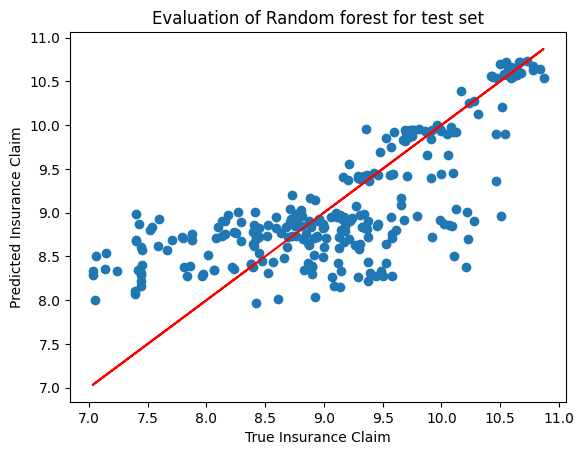

In [32]:
plt.scatter(y_test, randforest_model.predict(X_test))

plt.plot(y_test, y_test, color='red')

plt.xlabel('True Insurance Claim')
plt.ylabel('Predicted Insurance Claim')
plt.title('Evaluation of Random forest for test set')

Text(0.5, 1.0, 'Evaluation of XGBoost for test set')

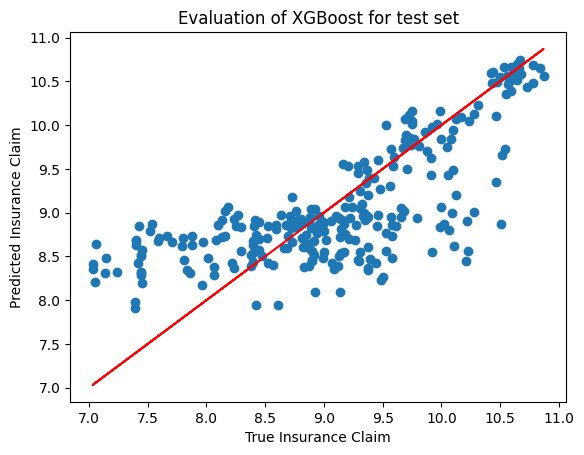

In [35]:
plt.scatter(y_test, xgb_r.predict(X_test))

plt.plot(y_test, y_test, color='red')

plt.xlabel('True Insurance Claim')
plt.ylabel('Predicted Insurance Claim')
plt.title('Evaluation of XGBoost for test set')

By looking at the result, the model can provide very similar result to some of the cases but for other points (I think it may be outlier or something), its prediction is not very good. In real world, more feature engineering things and more data collections needs to be done but in my case, my focus is to make the deployable API with this dataset so let me stop the model part here

In [34]:
joblib.dump(randforest_model, '../models/model.joblib')

['../models/model.joblib']